### **Bank Marketing Campaign Project**

#### Created by M. Rizky Bayu Aji

[Sumber Data Bank Marketing Campaign](https://drive.google.com/file/d/1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK/view?usp=drive_link)

#### **1. Business Problem Understanding**

**Context**

Jenis produk keuangan yang digunakan oleh publik semakin bervariasi. Salah satu produk keuangan yang dikenal luas oleh masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah nasabah menyetorkan sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya bisa ditarik setelah jangka waktu tertentu. Sebagai kompensasi, nasabah akan diberikan bunga tetap sesuai dengan jumlah uang yang disetorkan.

Namun, sebagai entitas bisnis dengan produk keuangan dan pelanggan masing-masing, bank tetap harus bersaing agar tidak kehilangan pelanggan. Salah satu cara untuk memperoleh pelanggan baru adalah dengan melakukan kampanye pemasaran.

Target :

0 : Tidak melakukan deposito

1 : Melakukan deposito

**Problem Statement**

Bank perlu menarik nasabah baru dan mempertahankan yang sudah ada untuk produk deposito berjangka mereka. Dengan berbagai produk keuangan yang tersedia, persaingan antar bank sangat ketat. Untuk mengatasi tantangan ini, bank bertujuan untuk mengadakan kampanye pemasaran untuk mempromosikan penawaran deposito berjangka. Tujuannya adalah mengidentifikasi profil nasabah dan strategi pemasaran yang menghasilkan pembukaan rekening deposito berjangka yang sukses.

**Goals**

Bank ingin mempunyai kemampuan untuk mengidentifikasi profil nasabah berdasarkan faktor-faktor apa saja yang mempengaruhi nasabah yang akan membuka rekening deposito dan yang tidak akan, guna membuat strategi pemasaran yang menghasilkan tingkat konversi yang lebih tinggi atau tepat sasaran.

**Analytic Approach**

Jadi kita akan menganalisis output model untuk mengidentifikasi faktor-faktor utama yang mempengaruhi langganan deposito berjangka.

Kemudian kita akan membangun model klasifikasi yang akan membantu untuk memberikan wawasan dan rekomendasi yang dapat ditindaklanjuti untuk mengoptimalkan kampanye pemasaran di masa depan.

**Evaluation Metrics**

Type 1 error : False Positive

Kondisi: Nasabah terdeteksi berkeinginan membuka rekening deposito, padahal sebenarnya tidak tertarik untuk melakukannya.

Konsekuensi: Kampanye yang dilakukan cenderung sia-sia.

Type 2 error : False Negative

Kondisi: Nasabah terdeteksi tidak berkeinginan membuka rekening deposito, padahal sebenarnya tertarik untuk melakukannya.

Konsekuensi: Kehilangan calon nasabah potensial.

Berdasarkan konsekuensinya, tujuan utamanya adalah menciptakan model yang dapat mengurangi biaya kampanye bagi bank tanpa mengurangi jumlah calon nasabah potensial. Kita ingin mendapatkan sebanyak mungkin prediksi kelas positif yang benar, sambil meminimalkan prediksi yang salah positif (False Positive). Oleh karena itu, metric utama yang akan kita gunakan adalah F1-Score.

#### **2. Data Understanding**

Dataset merupakan data profil nasabah bank, berikut ini adalah keterangan kolom yang ada:

**Attribute Information**


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| age | Integer | Usia nasabah |
| job | Object | Pekerjaan nasabah |
| balance | Integer | Total saldo tahunan nasabah |
| housing | Object | Status kepemilikan cicilan rumah |
| loan | Object | Status kepemilikan hutang |
| contact | Object | Tipe alat komunikasi |
| month | Object | Bulan terakhir nasabah dihubungi |
| campaign | Integer | Jumlah kontak yang dihubungi selama masa kampanye |
| pdays | Integer | Jumlah hari setelah nasabah dihubungi dalam kampanye sebelumnya |
| poutcome | Object | Hasil dari kampanye sebelumnya |
| deposit | Object | Nasabah membuka rekening deposito atau tidak |

Berdasarkan dataset ini, syarat utama membuka rekening deposito adalah memiliki kartu identitas dimana syarat memiliki kartu identitas adalah berusia 17 tahun. Namun, hal ini kembali lagi kepada ketentuan pada pihak bank karena ada beberapa bank yang diharuskan memiliki rekening tabungan atau giro yang dapat diperiksa dalam kolom `balance`, dan yang tidak mengharuskan. Dalam hal ini, kita mengambil ketentuan bank yang tidak mengharuskan nasabah mempunyai rekening tabungan atau giro. [Sumber](https://www.bca.co.id/id/Individu/produk/simpanan/Deposito-Berjangka#)

In [684]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [685]:
# Load Dataset

df = pd.read_csv('data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom pada dataset ini adalah {df.shape}')
display(df.head(), df.tail())

Jumlah baris dan kolom pada dataset ini adalah (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


In [686]:
# Count data and type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [687]:
# Check minimal age for deposit

if df['age'].min() < 17:
    print("Ada nasabah yang berusia di bawah 17 tahun.")
else:
    print("Semua nasabah berusia di atas atau sama dengan 17 tahun.")

Semua nasabah berusia di atas atau sama dengan 17 tahun.


Kita akan memeriksa apakah ada data yang hilang dalam fitur/kolom, dari data yang kita miliki tidak ada kolom yang secara eksplisit dinyatakan tidak relevan dalam konteks masalah yang sedang kita pecahkan.

In [688]:
pd.DataFrame({
    'column': df.columns.values,
    'type': df.dtypes.values,
    'null' : df.isna().sum(),
    'unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'unique_sample': [df[col].unique() for col in df.columns]
})

,column,type,null,unique,min,max,unique_sample
age,age,int64,0,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
job,job,object,0,12,admin.,unknown,"[admin., self-employed, services, housemaid, t..."
balance,balance,int64,0,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
housing,housing,object,0,2,no,yes,"[no, yes]"
loan,loan,object,0,2,no,yes,"[no, yes]"
contact,contact,object,0,3,cellular,unknown,"[cellular, telephone, unknown]"
month,month,object,0,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
campaign,campaign,int64,0,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
pdays,pdays,int64,0,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
poutcome,poutcome,object,0,4,failure,unknown,"[unknown, other, failure, success]"


Dari hasil diatas kita akan menangani data `unknown` pada kolom `job`, `contact`, `poutcome`. Dan kolom `month` dan `deposit` akan di encoding agar analisis lebih mudah.

### **3. Data Cleaning**

**Missing Value**

(age         0
 job         0
 balance     0
 housing     0
 loan        0
 contact     0
 month       0
 campaign    0
 pdays       0
 poutcome    0
 deposit     0
 dtype: int64,
 <Axes: >)

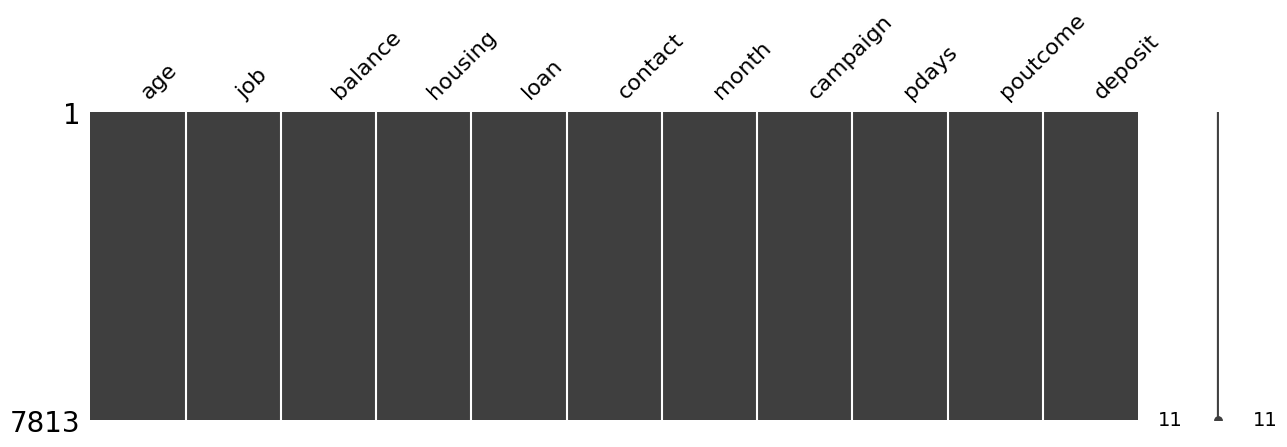

In [689]:
# Check missing value
df.isna().sum(), msno.matrix(df, figsize=(15, 4))

Tidak terdapat missing value.

**Data Duplicate**

In [690]:
# Check duplicated data

Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 8
Persentase Data Duplikat: 0.1%
Jumlah baris dan kolom: (7813, 11)


Terdapat data duplikat sebesar 0.1%, maka kita dapat menghilangkan salah satunya.

In [691]:
# Drop duplikat
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

# Recheck duplicated data
Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum() / df.shape[0]) * 100, 2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

# Count row and column
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%
Jumlah baris dan kolom: (7805, 11)


**Outliers**

In [692]:
# Calculate Z-scores for numerical columns
numerical_cols = ['age', 'balance', 'campaign', 'pdays']
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers using Z-score
outliers_zscore = (z_scores.abs() > 3).sum()

outliers_zscore

age          69
balance     136
campaign    149
pdays       122
dtype: int64

In [693]:
# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the numerical columns
iso_forest.fit(df[numerical_cols])

# Predict the outliers
outliers_iforest = iso_forest.predict(df[numerical_cols])

# Create a new DataFrame without the outliers
df_cleaned = df[outliers_iforest == 1]

# Display the shape of the original and cleaned DataFrame
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape

((7805, 11), (7414, 11))

Setelah menggunakan Isolation Forest, kita telah menghapus outliers dari dataset:
- Original dataset shape: 7805 sampel, 11 fitur (Sudah dikurang 8 karena data duplicate sudah di drop, Originalnya adalah 7813)
- Cleaned dataset shape: 7414 sampel, 11 fitur

Dengan menggunakan Isolation Forest, kita dapat mendeteksi dan menghapus outliers secara efektif, memastikan data yang lebih bersih dan lebih cocok untuk analisis dan pelatihan model pembelajaran mesin. Hal ini membantu meningkatkan kinerja model dan memberikan hasil yang lebih andal.

#### **4. Exploratory Data Analysis**

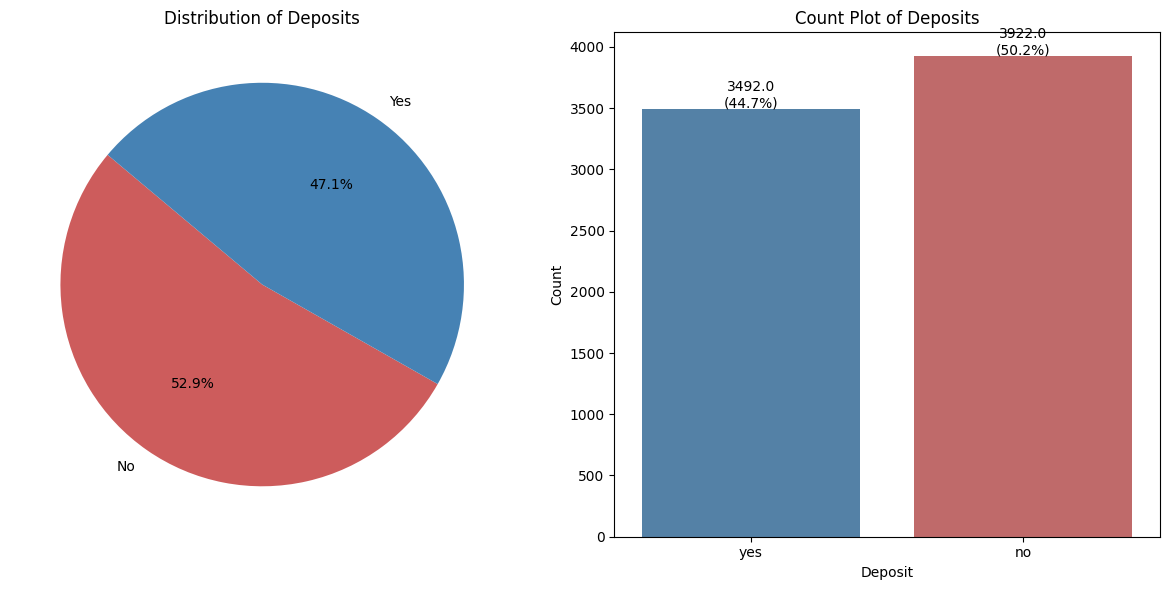

In [694]:
# Data for the target column
target_counts = df_cleaned['deposit'].value_counts()
target_labels = ['No', 'Yes']  # Directly using the labels instead of label encoders

# Plotting pie chart
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', startangle=140, colors=['indianred', 'steelblue'])
plt.title('Distribution of Deposits')

# Countplot with annotations
plt.subplot(1, 2, 2)
sns.countplot(x='deposit', data=df_cleaned, palette=['steelblue', 'indianred'])
plt.title('Count Plot of Deposits')
plt.xlabel('Deposit')
plt.ylabel('Count')

# Annotate the countplot
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}\n({height/len(df)*100:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

- Perbandingan data menunjukkan bahwa `52,9%` atau sebanyak `3922` nasabah tidak membuka deposito, sedangkan 47,1% atau sebanyak 3492 nasabah membuka deposito.
- Perbandingan ini termasuk dalam kategori target yang seimbang (balance), karena persentase nasabah yang membuka deposito dan yang tidak hampir sama.

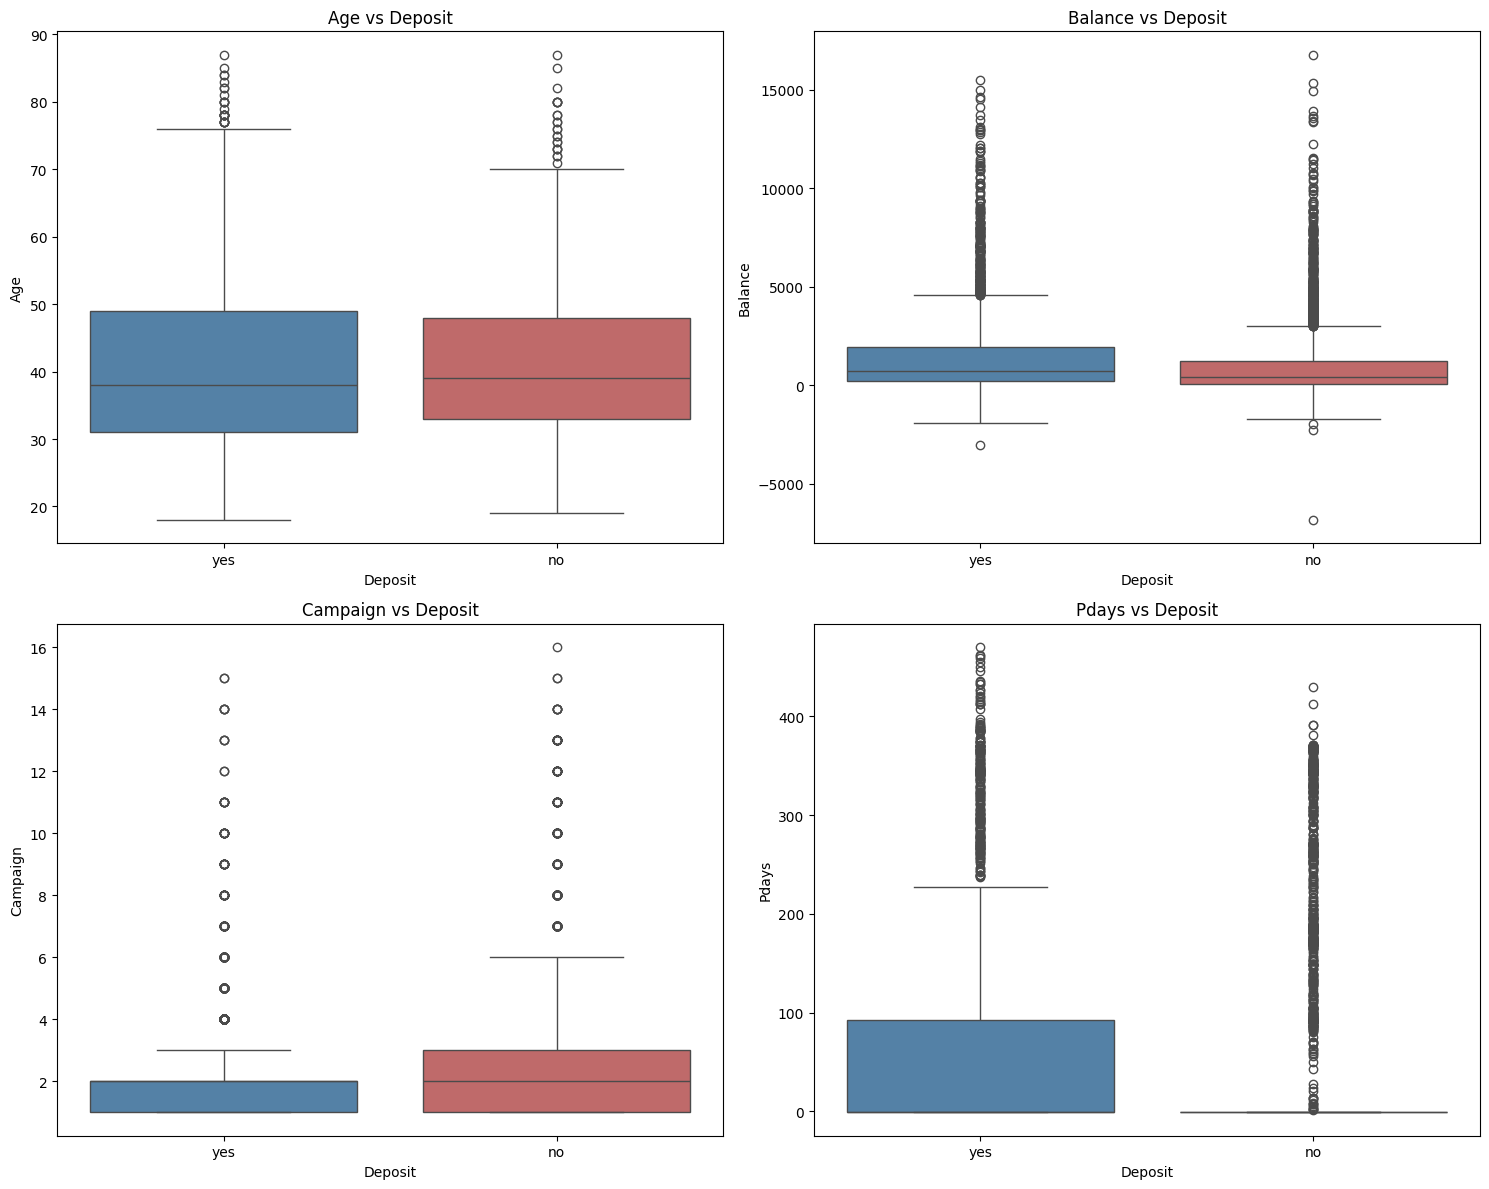

In [695]:
# Create subplots for visualizing the relationships between age, balance, campaign, pdays and deposit
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Age vs Deposit
sns.boxplot(x='deposit', y='age', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[0, 0])
axs[0, 0].set_title('Age vs Deposit')
axs[0, 0].set_xlabel('Deposit')
axs[0, 0].set_ylabel('Age')

# Balance vs Deposit
sns.boxplot(x='deposit', y='balance', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[0, 1])
axs[0, 1].set_title('Balance vs Deposit')
axs[0, 1].set_xlabel('Deposit')
axs[0, 1].set_ylabel('Balance')

# Campaign vs Deposit
sns.boxplot(x='deposit', y='campaign', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[1, 0])
axs[1, 0].set_title('Campaign vs Deposit')
axs[1, 0].set_xlabel('Deposit')
axs[1, 0].set_ylabel('Campaign')

# Pdays vs Deposit
sns.boxplot(x='deposit', y='pdays', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[1, 1])
axs[1, 1].set_title('Pdays vs Deposit')
axs[1, 1].set_xlabel('Deposit')
axs[1, 1].set_ylabel('Pdays')

plt.tight_layout()
plt.show()

Berikut adalah beberapa insight yang dapat diperoleh dari hasil boxplot tersebut:

1. Umur vs. Deposit:
- Distribusi umur nasabah yang melakukan deposito berjangka lebih merata dibandingkan dengan yang tidak melakukan deposito.
- Tampaknya ada sedikit perbedaan umur rata-rata antara nasabah yang melakukan deposito dan yang tidak, dengan nasabah yang melakukan deposito cenderung lebih tua.

2. Saldo vs. Deposit:
- Nasabah yang memiliki saldo lebih tinggi cenderung lebih mungkin untuk melakukan deposito berjangka.
- Terdapat beberapa outlier pada nasabah yang tidak melakukan deposito, yang menunjukkan ada nasabah dengan saldo tinggi tetapi tidak tertarik pada deposito.

3. Kampanye vs. Deposit:
- Jumlah kontak yang dilakukan dalam kampanye untuk nasabah yang melakukan deposito cenderung lebih rendah.
- Nasabah yang tidak melakukan deposito cenderung menerima lebih banyak kontak selama kampanye, yang mungkin menunjukkan bahwa terlalu banyak kontak dapat berpotensi mengurangi minat nasabah.

4. Pdays vs. Deposit:
- Nilai pdays yang rendah (sering dihubungi dalam waktu dekat) lebih umum pada nasabah yang tidak melakukan deposito.
- Nasabah yang melakukan deposito cenderung memiliki nilai pdays yang lebih tinggi atau tidak dihubungi dalam kampanye sebelumnya, yang menunjukkan bahwa nasabah yang jarang dihubungi atau dihubungi setelah waktu yang lama lebih mungkin untuk melakukan deposito.

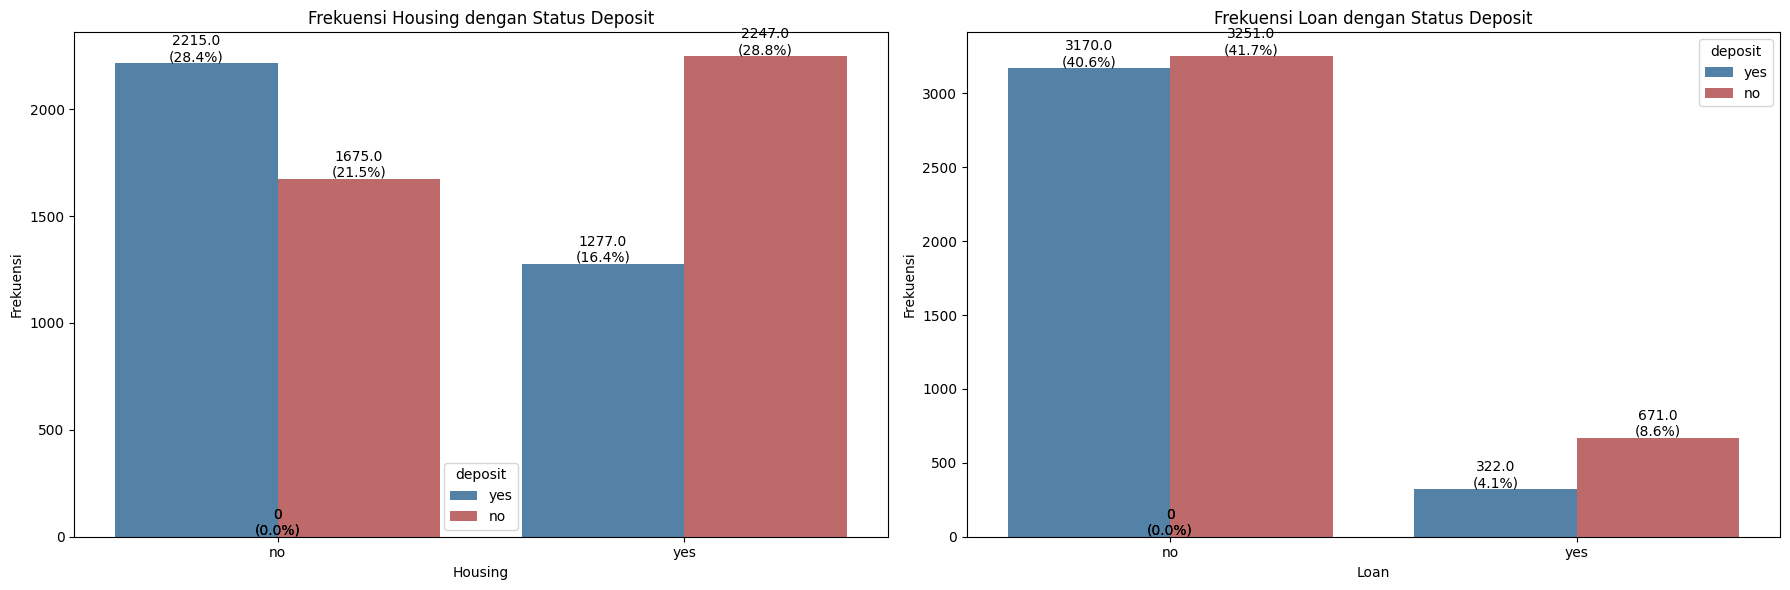

In [696]:
# Create subplots for visualizing the frequencies of housing and loan with deposit status side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Housing vs Deposit
sns.countplot(x='housing', hue='deposit', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[0])
axs[0].set_title('Frekuensi Housing dengan Status Deposit')
axs[0].set_xlabel('Housing')
axs[0].set_ylabel('Frekuensi')

# Annotate the countplot
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}\n({height/len(df)*100:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Loan vs Deposit
sns.countplot(x='loan', hue='deposit', data=df_cleaned, palette=['steelblue', 'indianred'], ax=axs[1])
axs[1].set_title('Frekuensi Loan dengan Status Deposit')
axs[1].set_xlabel('Loan')
axs[1].set_ylabel('Frekuensi')

# Annotate the countplot
for p in axs[1].patches:
    height = p.get_height()
    axs[1].annotate(f'{height}\n({height/len(df)*100:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

1. Housing vs. Deposit:

Nasabah yang tidak memiliki pinjaman rumah (no) lebih cenderung melakukan deposito dibandingkan dengan nasabah yang memiliki pinjaman rumah (yes). Hal ini menunjukkan bahwa nasabah tanpa beban pinjaman rumah mungkin merasa lebih leluasa untuk menempatkan dana mereka dalam deposito.

2. Loan vs. Deposit:

Nasabah yang tidak memiliki pinjaman pribadi (no) lebih cenderung melakukan deposito dibandingkan dengan nasabah yang memiliki pinjaman pribadi (yes). Nasabah dengan beban pinjaman pribadi mungkin lebih enggan untuk mengunci uang mereka dalam deposito karena mereka mungkin membutuhkan likuiditas yang lebih tinggi untuk membayar pinjaman mereka.

#### **5. Feature Engineering**

In [697]:
# Describe column

display(
    # numerical variable
    df_cleaned.describe(),
    # categorical variable
    df_cleaned.describe(include='object')
)

,age,balance,campaign,pdays
count,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.807661,1234.369976,2.328972,43.843135
std,11.299294,1921.718041,1.955620,94.018547
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,121.000000,1.000000,-1.000000
50%,38.000000,519.000000,2.000000,-1.000000
75%,48.750000,1573.750000,3.000000,-1.000000
max,87.000000,16786.000000,16.000000,470.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7414,7414,7414,7414,7414,7414,7414
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1700,3890,6421,5341,1899,5665,3922


**Data Wrangling**

In [698]:
# Change deposit values 'no' dan ' yes
df_cleaned['deposit'] = df_cleaned['deposit'].map({'yes': 1, 'no': 0})

# Check the result
display(df_cleaned.head())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


In [699]:
# Verify the changes
df_cleaned['deposit'].value_counts()

deposit
0    3922
1    3492
Name: count, dtype: int64

**Data Typo**

In [700]:
# Check typo for categorical column
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']

for i in cat_columns:
    uniqueValue = df_cleaned[i].unique()
    print(f"Feature {i}: {uniqueValue}")

Feature job: ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Feature housing: ['no' 'yes']
Feature loan: ['no' 'yes']
Feature contact: ['cellular' 'telephone' 'unknown']
Feature month: ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
Feature poutcome: ['unknown' 'other' 'failure' 'success']


Pada kolom `job` terdapat typo yaitu **admin.**, kita akan mengatasinya.

In [701]:
# Rename admin with replace
df_cleaned['job'] = df_cleaned['job'].replace({'admin.': 'admin'})
df_cleaned['job'].unique()

array(['admin', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', 'unknown'], dtype=object)

**Encoding Variable Categorical and Numerical**

In [702]:
# Combine 'retired', 'student', 'unknown' into 'unemployed' in the 'job' column
df_cleaned['job'] = df_cleaned['job'].replace({'retired': 'unemployed', 'student': 'unemployed', 'unknown': 'unemployed'})

# Change 'housemaid' category to 'services' in the 'job' column
df_cleaned['job'] = df_cleaned['job'].replace({'housemaid': 'services'})

# Verify the changes
df_cleaned['job'].value_counts()

job
management       1700
blue-collar      1294
technician       1231
unemployed        972
admin             908
services          814
self-employed     267
entrepreneur      228
Name: count, dtype: int64

Menggabungkan kategori pekerjaan yang serupa untuk menyederhanakan analisis dan model. Menggabungkan **student, retired, dan unknown** menjadi **unemployed** karena sedang tidak bekerja dan mengasumsikan **unknown** menjadi **unemployed** karena tidak diketahui informasinya.

Serta **housemaid** menjadi **services** karena masih termasuk kategori pekerjaan yang sama. [sumber](https://en.wikipedia.org/wiki/Maid)

In [703]:
# Combine 'unknown' category into 'other' in the 'poutcome' column
df_cleaned['poutcome'] = df_cleaned['poutcome'].replace({'unknown': 'other'})

# Verify the changes
df_cleaned['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

Penggabungan kategori **unknown** dengan **other** pada kolom `poutcome` karena informasinya tidak diketahui.

In [704]:
# Define the correct order of the months with numerical encoding starting from 1 for January
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Apply the mapping to the 'month' column
df_cleaned['month'] = df_cleaned['month'].map(month_mapping)

# Verify the changes
df_cleaned['month'].value_counts().sort_index()

month
1      221
2      510
3      183
4      631
5     1899
6      825
7      994
8     1021
9      179
10     260
11     630
12      61
Name: count, dtype: int64

Merubah fitur/kolom `month` menggunakan Ordinal Encoding, karena fitur ini memiliki urutan.

In [705]:
# Create a new feature 'balance_category' based on the 'balance' column
# Define balance categories
bins = [-float('inf'), 0, 1000, 5000, float('inf')]
labels = ['negative', 'low', 'medium', 'high']

# Apply the bins and labels to create the new 'balance_category' column
df_cleaned['balance_category'] = pd.cut(df_cleaned['balance'], bins=bins, labels=labels)

# Verify the new column
df_cleaned['balance_category'].value_counts()

balance_category
low         3859
medium      2196
negative     988
high         371
Name: count, dtype: int64

In [706]:
# Identify numerical columns to be normalized
numerical_cols_to_normalize = ['age', 'balance', 'campaign', 'pdays']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_cleaned[numerical_cols_to_normalize] = scaler.fit_transform(df_cleaned[numerical_cols_to_normalize])

# Verify the normalization
df_cleaned[numerical_cols_to_normalize].head()

,age,balance,campaign,pdays
0,1.256122,0.222540,-0.168230,-0.476993
1,-0.159991,-2.233761,0.343151,-0.476993
2,0.902094,0.931849,-0.679612,3.277839
3,-0.248498,-0.687645,-0.679612,-0.476993
4,-0.425512,-0.535687,0.854532,-0.476993


Alasan melakukan normalisasi fitur numerik untuk konsistensi skala karena fitur dengan skala yang berbeda bisa mempengaruhi kinerja algoritma pembelajaran mesin.

Disini saya menggunakan StandarScaler karena mentransformasi data sedemikian rupa sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini memastikan bahwa setiap fitur memiliki distribusi yang serupa, yang ideal untuk banyak algoritma pembelajaran mesin. 

Lalu konsistensi StandardScaler adalah metode umum yang sering digunakan dan dianggap standar dalam praktek machine learning. Ini memberikan konsistensi dalam proses dan membuat model lebih mudah direplikasi dan dipahami oleh orang lain.

In [707]:
df_cleaned.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_category
0,1.256122,admin,0.222540,no,no,cellular,6,-0.168230,-0.476993,other,1,medium
1,-0.159991,self-employed,-2.233761,yes,yes,cellular,4,0.343151,-0.476993,other,1,negative
2,0.902094,admin,0.931849,no,no,cellular,5,-0.679612,3.277839,other,1,medium
3,-0.248498,services,-0.687645,yes,no,cellular,5,-0.679612,-0.476993,other,0,negative
4,-0.425512,services,-0.535687,yes,no,telephone,11,0.854532,-0.476993,other,0,low


In [708]:
# Perform One-Hot Encoding again after combining categories
df_encoded = pd.get_dummies(df_cleaned, columns=['job', 'housing', 'loan', 'contact', 'poutcome', 'balance_category'], drop_first=True).astype(int)

# Verify the changes
df_encoded.head()

,age,balance,month,campaign,pdays,deposit,job_blue-collar,job_entrepreneur,job_management,job_self-employed,...,job_unemployed,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,balance_category_low,balance_category_medium,balance_category_high
0,1,0,6,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,-2,4,0,0,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0
2,0,0,5,0,3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,5,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,11,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


Melakukan One-Hot Encoding setelah menggabungkan kategori membantu dalam mengubah variabel kategorikal menjadi format numerik yang dapat digunakan oleh algoritma machine learning.

In [709]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7414 entries, 0 to 7804
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      7414 non-null   int32
 1   balance                  7414 non-null   int32
 2   month                    7414 non-null   int32
 3   campaign                 7414 non-null   int32
 4   pdays                    7414 non-null   int32
 5   deposit                  7414 non-null   int32
 6   job_blue-collar          7414 non-null   int32
 7   job_entrepreneur         7414 non-null   int32
 8   job_management           7414 non-null   int32
 9   job_self-employed        7414 non-null   int32
 10  job_services             7414 non-null   int32
 11  job_technician           7414 non-null   int32
 12  job_unemployed           7414 non-null   int32
 13  housing_yes              7414 non-null   int32
 14  loan_yes                 7414 non-null   int32
 15  contact_t

#### **6. Model Building**

In [710]:
# Split the data into training and testing sets
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

pd.DataFrame(results).T

,accuracy,precision,recall,f1_score
Logistic Regression,0.690492,0.681887,0.641834,0.661255
Decision Tree,0.674983,0.676471,0.593123,0.632061
Random Forest,0.687795,0.684458,0.624642,0.653184
Gradient Boosting,0.734997,0.777778,0.611748,0.684844
Support Vector Machine,0.716116,0.745133,0.603152,0.666667
K-Nearest Neighbors,0.678355,0.672387,0.617479,0.643764


- Membagi data untuk melatih model dan menguji performanya pada data yang belum pernah dilihat model, sehingga dapat mengukur generalisasi model.
- Menggunakan beberapa model untuk membandingkan performa dan memilih model terbaik untuk masalah klasifikasi ini.
- Melatih model untuk belajar dari data pelatihan dan mengevaluasi model pada data pengujian untuk mengukur performa sebenarnya.
- Menyimpan metrik evaluasi untuk membandingkan model dan memilih yang terbaik

Gradient Boosting menunjukkan kinerja terbaik berdasarkan F1-Score.

Langkah selanjutnya adalah melakukan hyperparameter tuning pada model yang berkinerja terbaik (Gradient Boosting) untuk meningkatkan kinerjanya.

In [711]:
# Define the parameter grid with wider range
param_distributions = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'min_samples_split': np.arange(2, 15)
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_distributions, 
                                   scoring='f1', cv=5, n_iter=100, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print("Best Parameters (Randomized Search):", best_params_random)
print("Best Model (Randomized Search):", best_model_random)

y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random)
recall_random = recall_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)

print(f'Accuracy: {accuracy_random}')
print(f'Precision: {precision_random}')
print(f'Recall: {recall_random}')
print(f'F1-Score: {f1_random}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (Randomized Search): {'subsample': 0.7, 'n_estimators': 250, 'min_samples_split': 4, 'max_depth': 3, 'learning_rate': 0.07333333333333333}
Best Model (Randomized Search): GradientBoostingClassifier(learning_rate=0.07333333333333333,
                           min_samples_split=4, n_estimators=250,
                           random_state=42, subsample=0.7)
Accuracy: 0.7349966284558328
Precision: 0.7670753064798599
Recall: 0.6275071633237822
F1-Score: 0.6903073286052009


Hyperparameter tuning menggunakan RandomizedSearchCV dilakukan untuk mengoptimalkan performa model secara efisien dengan mencari kombinasi parameter terbaik, menghindari overfitting, dan memastikan model dapat menangani variabilitas data.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

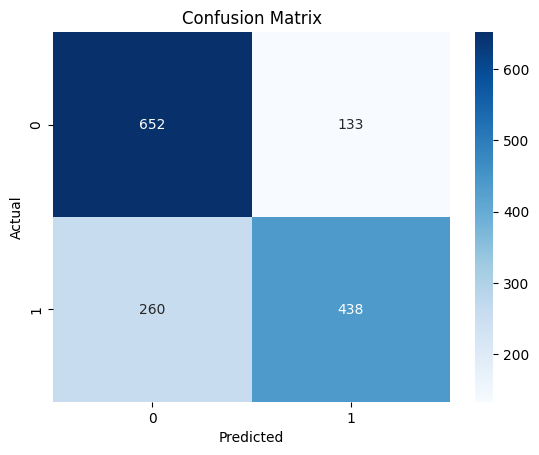

In [712]:
# Define the parameter grid with wider range
param_grid = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'min_samples_split': (2, 15)
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=gb_model, search_spaces=param_grid, 
                             scoring='f1', cv=5, n_iter=50, verbose=2, n_jobs=-1, random_state=42)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Best parameters and model
best_params_bayes = bayes_search.best_params_
best_model_bayes = bayes_search.best_estimator_

print("Best Parameters (Bayesian Optimization):", best_params_bayes)
print("Best Model (Bayesian Optimization):", best_model_bayes)

y_pred_bayes = best_model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
precision_bayes = precision_score(y_test, y_pred_bayes)
recall_bayes = recall_score(y_test, y_pred_bayes)
f1_bayes = f1_score(y_test, y_pred_bayes)

print(f'Accuracy: {accuracy_bayes}')
print(f'Precision: {precision_bayes}')
print(f'Recall: {recall_bayes}')
print(f'F1-Score: {f1_bayes}')

# Visualization confuision matrix Bayes
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Menggunakan BayesSearchCV memungkinkan untuk melakukan pencarian hyperparameter yang lebih cerdas dan efisien, mengoptimalkan model dengan pendekatan berbasis probabilistik yang dapat meningkatkan performa model secara keseluruhan.

In [713]:
# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), n_jobs=-1)

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Evaluate stacking model
y_pred_stack = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

print(f'Stacking Model Accuracy: {accuracy_stack}')
print(f'Stacking Model Precision: {precision_stack}')
print(f'Stacking Model Recall: {recall_stack}')
print(f'Stacking Model F1-Score: {f1_stack}')

Stacking Model Accuracy: 0.7329737019554956
Stacking Model Precision: 0.7585616438356164
Stacking Model Recall: 0.6346704871060171
Stacking Model F1-Score: 0.6911076443057722


Menggunakan StackingClassifier memungkinkan kita untuk memanfaatkan kekuatan berbagai model, mengurangi kelemahan masing-masing model, dan meningkatkan kemampuan generalisasi serta performa keseluruhan model. Dengan pendekatan ini, kita dapat mencapai prediksi yang lebih akurat dan andal.

#### **7. Model Evaluation**

Akurasi Model Stacking: 0.7330
Precision Model Stacking: 0.7586
Recall Model Stacking: 0.6347
F1-Score Model Stacking: 0.6911


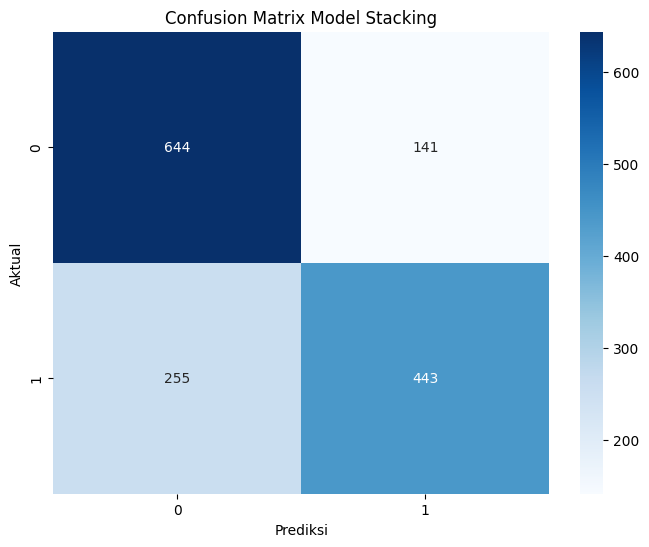

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       785
           1       0.76      0.63      0.69       698

    accuracy                           0.73      1483
   macro avg       0.74      0.73      0.73      1483
weighted avg       0.74      0.73      0.73      1483



In [714]:
# Menghasilkan prediksi dari model stacking
y_pred_stack = stacking_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

# Menampilkan hasil metrik evaluasi
print(f'Akurasi Model Stacking: {accuracy_stack:.4f}')
print(f'Precision Model Stacking: {precision_stack:.4f}')
print(f'Recall Model Stacking: {recall_stack:.4f}')
print(f'F1-Score Model Stacking: {f1_stack:.4f}')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_stack)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model Stacking')
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_stack))

- Accuracy: Mengukur seberapa sering model membuat prediksi yang benar secara keseluruhan.

- Precision: Mengukur seberapa banyak prediksi positif yang benar-benar positif. Penting untuk mengurangi false positives.

- Recall: Mengukur seberapa banyak kasus positif yang sebenarnya terdeteksi oleh model. Penting untuk mengurangi false negatives.

- F1-Score: Rata-rata harmonis dari precision dan recall. Baik untuk mengukur keseimbangan antara precision dan recall.

- Confusion Matrix: Menampilkan jumlah true positives, true negatives, false positives, dan false negatives untuk memberikan gambaran lengkap tentang performa model.

Interpretasi Confusion Matrix
True Positives (TP): Kasus positif yang diprediksi dengan benar oleh model. Dimana model memprediksi dengan benar nasabah yang ingin membuka deposito.

True Negatives (TN): Kasus negatif yang diprediksi dengan benar oleh model. Dimana model memprediksi dengan benar nasabah yang tidak ingin membuka deposito.

False Positives (FP): Kasus negatif yang salah diprediksi sebagai positif oleh model. Dimana model salah memprediksi orang akan membuka deposito.

False Negatives (FN): Kasus positif yang salah diprediksi sebagai negatif oleh model. Dimana model salah memprediksi orang tidak akan membuka deposito.

#### **8. Conclusion and Reccomendation**

**1. Ringkasan Performa Model**

Berdasarkan evaluasi model Stacking yang dilakukan, berikut adalah metrik utama yang diperoleh:

- Akurasi: 0.7330
- Precision: 0.7586
- Recall: 0.6347
- F1-Score: 0.6911

Temuan Utama:

Model Stacking memiliki performa yang baik dengan F1-Score sebesar 0.6911.

Precision menunjukkan bahwa dari semua prediksi positif, sekitar 75.86% adalah benar-benar positif, yang menunjukkan model cukup efektif dalam mengurangi false positives.

Recall menunjukkan bahwa dari semua kasus positif yang sebenarnya, sekitar 63.47% berhasil dideteksi oleh model, yang berarti ada ruang untuk peningkatan dalam mengurangi false negatives.

Akurasi model sebesar 73.30% menunjukkan model mampu memprediksi dengan benar mayoritas kasus dalam data uji.

**2. Rekomendasi untuk Meningkatkan Kampanye Pemasaran di Masa Depan**

Targeting yang Lebih Tepat:
- Gunakan hasil model untuk menargetkan nasabah yang lebih mungkin membuka deposito. Fokus pada segmen yang memiliki probabilitas tinggi berdasarkan prediksi model.
- Pertimbangkan untuk membuat kampanye yang lebih spesifik untuk segmen-segmen tertentu yang teridentifikasi memiliki minat tinggi terhadap deposito berjangka.

Optimasi Sumber Daya Pemasaran:
- Alokasikan sumber daya pemasaran secara lebih efisien dengan mengurangi upaya pada segmen yang model prediksi tidak akan membuka deposito.
- Gunakan analisis lebih lanjut untuk memahami karakteristik nasabah yang cenderung membuka deposito dan sesuaikan strategi pemasaran.

Personalisasi Pesan:
- Buat pesan pemasaran yang lebih personal dan relevan berdasarkan profil nasabah yang cenderung membuka deposito.
- Gunakan data demografis dan perilaku untuk menyusun kampanye yang lebih menarik dan efektif.

**3. Langkah Selanjutnya untuk Penyempurnaan dan Penerapan Model**

Feature Engineering Lebih Lanjut:
- Lakukan analisis lebih lanjut untuk menemukan fitur-fitur tambahan yang bisa meningkatkan performa model.
- Pertimbangkan untuk menggunakan domain knowledge untuk menciptakan fitur yang lebih relevan.

Hyperparameter Tuning Lebih Ekstensif:
- Uji lebih banyak kombinasi parameter untuk memastikan model yang dihasilkan adalah yang paling optimal.

Model Ensemble dan Advanced Techniques:
- Pertimbangkan untuk menggunakan metode ensemble yang lebih canggih seperti Stacking atau Blending untuk meningkatkan performa.
- Eksplorasi penggunaan model yang lebih kompleks seperti neural networks jika data dan sumber daya mendukung.

Monitoring dan Pemeliharaan Model:
- Implementasikan model dalam sistem produksi dan lakukan monitoring secara berkala untuk memastikan performa tetap konsisten.
- Lakukan pemeliharaan model secara rutin dengan retraining menggunakan data terbaru untuk mempertahankan akurasi dan relevansi.

**Kapan Model Dapat Digunakan dan Tidak Dapat Digunakan**

*Kapan Model Dapat Digunakan*
- Data Valid dan Konsisten:

Model dapat digunakan ketika data yang dimasukkan konsisten dengan data yang digunakan untuk pelatihan.
Data yang baru harus dipreproses dengan cara yang sama seperti data pelatihan (misalnya normalisasi, encoding, dll).

- Profil Nasabah Sesuai:

Model dapat digunakan untuk nasabah dengan profil yang sesuai dengan data pelatihan.
Fitur-fitur yang digunakan oleh model (seperti usia, saldo, jumlah kampanye, dsb.) harus tersedia dan akurat.

- Kebutuhan Bisnis Sesuai:

Model dapat digunakan ketika tujuan bisnis sesuai dengan tujuan yang digunakan untuk membangun model.
Model cocok digunakan untuk meningkatkan kampanye pemasaran deposito berjangka, di mana prediksi nasabah potensial sangat penting.

- Evaluasi Berkala:

Model dapat digunakan jika performanya terus dievaluasi dan tetap memenuhi standar yang diinginkan.
Monitoring performa model di lingkungan produksi untuk memastikan akurasi dan relevansi tetap tinggi.

- Ketidakseimbangan Data Teratasi:

Model dapat digunakan jika ketidakseimbangan data telah ditangani dengan baik, seperti dengan menggunakan teknik SMOTE atau metode lain.

*Kapan Model Tidak Dapat Digunakan*
- Data Tidak Konsisten atau Hilang:

Model tidak dapat digunakan jika data yang dimasukkan tidak konsisten dengan data pelatihan atau jika terdapat banyak data yang hilang.
Misalnya, fitur-fitur penting yang digunakan oleh model tidak tersedia atau memiliki banyak nilai hilang.

- Ketidaksesuaian Profil Nasabah:

Model tidak dapat digunakan untuk profil nasabah yang sangat berbeda dari data pelatihan.
Misalnya, model dilatih menggunakan data nasabah dari wilayah tertentu, dan sekarang digunakan untuk wilayah yang sangat berbeda dengan karakteristik yang berbeda pula.

- Performanya Menurun:

Model tidak dapat digunakan jika evaluasi berkala menunjukkan penurunan performa yang signifikan.
Misalnya, F1-Score atau metrik lainnya turun di bawah standar yang dapat diterima.

- Tidak Sesuai dengan Tujuan Bisnis:

Model tidak dapat digunakan jika tujuan bisnis telah berubah dan tidak lagi sesuai dengan tujuan awal model.
Misalnya, fokus bisnis bergeser dari deposito berjangka ke produk keuangan lain yang membutuhkan model dengan karakteristik berbeda.

#### **9. Saving Model**

In [715]:
import pickle

# Save as..
model_filename = 'bank_marketing_campaign.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(stacking_model, file)

print(f"Model berhasil disimpan ke dalam file {model_filename}")

Model berhasil disimpan ke dalam file bank_marketing_campaign.pkl
